# Creating a Final Figure showing recalcitrant response of the bottom layer

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from fair.constants import molwt
from fair.forcing.ghg import etminan, meinshausen
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import scipy.stats as sty
import random
import pandas as pd
from tqdm import tqdm
import random
import os

from ar6.utils import check_and_download, mkdir_p
from ar6.utils.statistics import weighted_percentile
from ar6.utils.h5 import *
from ar6.utils import mkdir_p
from ar6.constants.gases import ghg_to_rcmip_names
from ar6.forcing.aerosol import ghan, aerocom_n
from ar6.forcing.ozone import eesc
from ar6.constants.gases import rcmip_to_ghg_names, ghg_to_rcmip_names, ods_species, radeff
from multiprocessing import Pool

from ar6.twolayermodel import TwoLayerModel
from ar6.constants import NINETY_TO_ONESIGMA

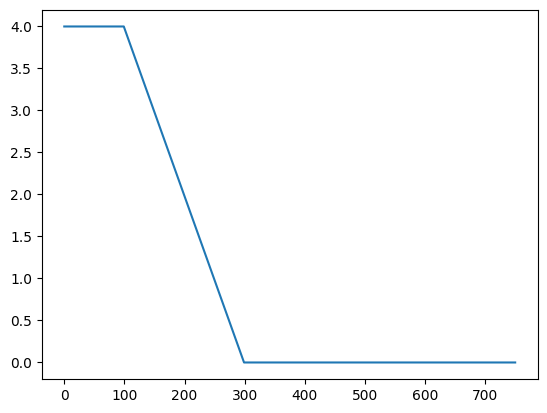

In [42]:
#Creating forcing

ts = np.array([100])

f_scenarios = {}

for t in ts:
    force = np.ones(751)
    force[:t] *= 4
    force[t:(t+200)] = np.flip(4/200*(np.arange(200)))
    force[(t+200):] = 0


plt.plot(force)


run_names = []



In [43]:

for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
    scm = TwoLayerModel(
        extforce= force,
        exttime=np.arange(1750,2501),
        tbeg=1750,
        tend=2501,
        lamg=1.18,
        t2x=None,
        eff=1.28,
        cmix=8.2,
        cdeep=109,
        gamma_2l=0.67,
        kappa=0, 
        sigma = 0.01,
        outtime=np.arange(1750.5,2501),
        dt=1  
    )
        
    out = scm.run()
    
        

100%|██████████| 1000/1000 [01:21<00:00, 12.30it/s]


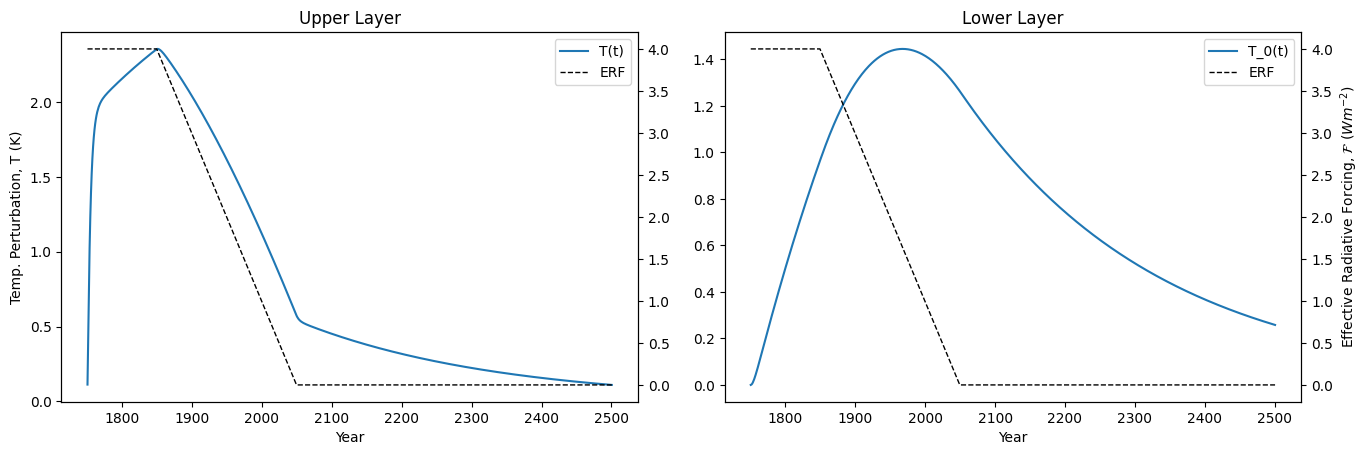

In [70]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(16)
axs[0].set_ylabel('Temp. Perturbation, T (K)')


layers = ["Upper Layer", "Lower Layer"]
colors = ["g", "r", "b"]

for (subpl, col, layer) in zip(axs, [0,1], layers):
    ax2 = subpl.twinx()
    ln2 = ax2.plot(out.time, force, linestyle = "dashed", color = "k", linewidth=1, label = "ERF")
    if col == 0:
        ln1 = subpl.plot(out.time, out.tg, label = "T(t)")  

    else:
        ln1 = subpl.plot(out.time, out.tlev[:,1], label = "T_0(t)")
        ax2.set_ylabel("Effective Radiative Forcing, $\mathcal{F}$ ($Wm^{-2}$)")
        
    subpl.title.set_text(layer)
    subpl.set_xlabel('Year')
    lns = ln1+ln2
    labs = [l.get_label() for l in lns]
    subpl.legend(lns, labs, loc=0)
    #subpl.plot(out.time, 0.65*force, linestyle = "dashed", color = "k", linewidth=0.5, label = "ERF")


    
